In [1]:
using Revise
using Plots
using Test
import Random
using BenchmarkTools

In [2]:
using Cluster

[ Info: Precompiling Cluster [1e9e0daf-e287-4c87-bb27-167a6bd94a1f]


### Generate a Cluster Problem
- Create 4 distinct points.
- Added noise about these points.

In [3]:
Random.seed!(1)
M1 = [-1,-2] .+ rand(2, 100)
M2 = 3.0 .* [1,2] .+ rand(2, 100)
M3 = 6.0 .* [2,1] .+ rand(2, 100)
M4 = 9.0 .* [1,1] .+ rand(2, 100)
M5 = 12.0 .* [-1, 1] .+ rand(2, 100)
M6 = 15.0 .* [0.5, 3.0] .+ rand(2, 100)
M7 = 18.0 .+ [-2.4, 1.0] .+ rand(2, 100)
M8 = 21.0 .+ [0.3, -0.3] .* rand(2, 100)
M9 = 24.0 .+ rand(2, 100)
M10 = 27.0 .+ rand(2, 100)

M = hcat(M1, M2, M3, M4, M5, M6, M7, M8, M9, M10)

2×1000 Matrix{Float64}:
 -0.950828  -0.606729  -0.308143  …  27.1424  27.3743  27.1601  27.6261
 -1.88092   -1.97591   -1.23248      27.8408  27.3209  27.8683  27.8839

### Find the best Clusters
- Find best info for a range of cluster numbers.
    - `ds` : The Total Variation for the cluster.                    Int -> Float
    - `mp` : Map of the Index of a point to the index of a Centroid. Int -> (Int -> Int) 
    - `xc` : The map of Centroid Indices to Centroids.               Int -> (2xn)Matrix{Float}
    - `sd` : The list of unused Centroid Indices.                    Int -> Vector{Int}

In [4]:
@time kbest, mp, xc, tv = find_best_cluster(M, 2:15, verbose=true, num_trials=300, N=1000, threshold=1.0e-2)

var_by_k     = [9297.292428057775, 7359.815971565828, 5894.628617189538, 3914.1615254354692, 2351.4029236327447, 2879.3443280618258, 1191.2291681525735, 1182.1936155766505, 350.15757352935907, 350.15757352935907, 547.1717169214442, 343.73142616134214, 341.31647848136015, 337.5874423124702]
var_by_k_mod = [13148.35704510799, 12747.575197108912, 11789.257234379076, 8752.331245787982, 5759.737342588785, 7618.029030975968, 3369.3048909915797, 3940.645385255501, 1107.2954723106589, 1266.9177697070902, 2211.368166402818, 1430.0091715535575, 1550.7513207097606, 1568.9646503579452]
rel change of var [-0.03143984968137106, -0.08128739102708274, -0.34698480933895187, -0.5195712452148274, 0.24393339547947507, -1.2610091034931534, 0.14498652845081544, -2.5588020395606996, 0.1259926265248737, 0.4270887186696025, -0.54640138706271, 0.07786042000656873, 0.01160850223364135]
mono_var_by_mod: [13148.35704510799, 12747.575197108912, 11789.257234379076, 8752.331245787982, 5759.737342588785, 5759.73734258

(10, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  10, 10, 10, 10, 10, 10, 10, 10, 10, 10], [-0.4647786335684582 3.4934544090790887 … 24.49422035218324 27.447603324472404; -1.5175945768316743 6.503798597479442 … 24.483990255724194 27.488695232426544], 350.15757352935907)

In [5]:
@time kbest, mp, xc, tv = find_best_cluster(M, 2:15, verbose=true, num_trials=300, N=1000, threshold=1.0e-2)

var_by_k     = [9297.292428057775, 7359.815971565828, 5894.628617189538, 3914.1615254354692, 2351.4029236327447, 2879.3443280618258, 1191.2291681525735, 1182.1936155766505, 350.15757352935907, 350.15757352935907, 547.1717169214442, 343.73142616134214, 341.31647848136015, 337.5874423124702]
var_by_k_mod = [13148.35704510799, 12747.575197108912, 11789.257234379076, 8752.331245787982, 5759.737342588785, 7618.029030975968, 3369.3048909915797, 3940.645385255501, 1107.2954723106589, 1266.9177697070902, 2211.368166402818, 1430.0091715535575, 1550.7513207097606, 1568.9646503579452]
rel change of var [-0.03143984968137106, -0.08128739102708274, -0.34698480933895187, -0.5195712452148274, 0.24393339547947507, -1.2610091034931534, 0.14498652845081544, -2.5588020395606996, 0.1259926265248737, 0.4270887186696025, -0.54640138706271, 0.07786042000656873, 0.01160850223364135]
mono_var_by_mod: [13148.35704510799, 12747.575197108912, 11789.257234379076, 8752.331245787982, 5759.737342588785, 5759.73734258

(10, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  10, 10, 10, 10, 10, 10, 10, 10, 10, 10], [-0.4647786335684582 3.4934544090790887 … 24.49422035218324 27.447603324472404; -1.5175945768316743 6.503798597479442 … 24.483990255724194 27.488695232426544], 350.15757352935907)

In [6]:
xc

2×10 Matrix{Float64}:
 -0.464779  3.49345  12.5115   9.47945  …  16.0674  21.1452  24.4942  27.4476
 -1.51759   6.5038    6.52431  9.50992     19.536   20.8398  24.484   27.4887

In [7]:
tv

350.15757352935907

### Plot the Result

In [8]:
x = xc[1, :]
y = xc[2, :]

10-element Vector{Float64}:
 -1.5175945768316743
  6.503798597479442
  6.524309174201606
  9.509921208077595
 12.457669306098992
 45.478311604029514
 19.536020332393772
 20.839828692792324
 24.483990255724194
 27.488695232426544

In [9]:
xp = M[1, :]
yp = M[2, :];

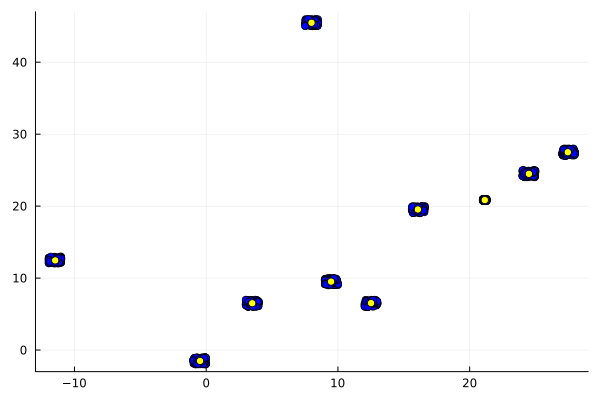

In [10]:
xs = vcat(xp, x)
xmin = minimum(xs)
xmax = maximum(xs)

ys = vcat(yp, y)
ymin = minimum(ys)
ymax = maximum(ys)

plot(xp, yp, seriestype=:scatter, color="blue", legend=:none, xlims=(xmin-1.0, xmax+1.0), ylims=(ymin-1.0, ymax+1.0))
g = plot!(x, y, seriestype=:scatter, color="yellow")

In [11]:
savefig(g,"synth_data_set_test.svg")

"/home/rsm/proj/github/julia/src/synth_data_set_test.svg"

### Higher Dimensional Version
We can't visualize, but look to see how close *kbest* is to 10.

In [10]:
Random.seed!(1)
M1 = [-1,-2,1, 1] .+ rand(4, 100)
M2 = 3.0 .* [1,2, -1, 2] .+ rand(4, 100)
M3 = 6.0 .* [2,1, 0, 3] .+ rand(4, 100)
M4 = 9.0 .* [1,1, -2, 0] .+ rand(4, 100)
M5 = 12.0 .* [-1, 1, 2, 2] .+ rand(4, 100)
M6 = 15.0 .* [0.5, 3.0, 2, -2] .+ rand(4, 100)
M7 = 18.0 .+ [-2.4, 1.0, 2, 0] .+ rand(4, 100)
M8 = 21.0 .+ [0.3, -0.3, 1, -1] .* rand(4, 100)
M9 = 24.0 .+ rand(4, 100)
M10 = 27.0 .+ rand(4, 100)

M = hcat(M1, M2, M3, M4, M5, M6, M7, M8, M9, M10)

4×1000 Matrix{Float64}:
 -0.950828  -0.308143  -0.159616  …  27.0147  27.9526  27.586   27.3153
 -1.88092   -1.23248   -1.10923      27.0683  27.0746  27.6242  27.042
  1.39327    1.08725    1.13823      27.8622  27.1865  27.7115  27.2123
  1.02409    1.85572    1.34774      27.5175  27.3522  27.1277  27.1553

In [11]:
using Cluster

In [12]:
kbest, mp, xc, tv = find_best_cluster(M, 2:15, verbose=true, num_trials=300, N=1000, threshold=1.0e-2)

var_by_k     = [18539.186370766292, 13762.751548480317, 9107.841928856604, 8295.86156133947, 4980.746337893871, 9607.690198933951, 2445.9454984552335, 3500.2258037544157, 540.071416288594, 540.071416288594, 706.8460115276677, 540.071416288594, 532.989502974615, 536.6756790193942]
var_by_k_mod = [22046.93233847675, 18112.79965967662, 12880.43357973934, 12405.20647492895, 7795.2892906941925, 17860.164216730856, 4113.573603113931, 6736.187700073619, 960.3978795365665, 1072.9708531648055, 1534.8534435840345, 1262.1578157008012, 1251.9055087721956, 1337.8181112974037]
rel change of var [-0.21720179943018078, -0.4062259276867579, -0.03830868158227186, -0.591372175210733, 0.5635376474650886, -3.3417636196447056, 0.3893320990641377, -6.013955198780865, 0.10491708446338202, 0.30092944205844663, -0.21605509587707275, -0.008189361622556068, 0.06421844778427375]
mono_var_by_mod: [22046.93233847675, 18112.79965967662, 12880.43357973934, 12405.20647492895, 7795.2892906941925, 7795.2892906941925, 411

(10, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  10, 10, 10, 10, 10, 10, 10, 10, 10, 10], [-0.4638613889337658 3.5158791577745627 … 24.52495440036195 27.475304728976617; -1.510189133119629 6.481867685295993 … 24.534671687480134 27.477645148329938; 1.5456574467128612 -2.451298977472739 … 24.478388500859637 27.462638597448805; 1.5005472893395762 6.462830546367099 … 24.458094669646908 27.493419893662846], 540.071416288594)

In [13]:
kbest

10

## Apply find_best_cluster to Iris DataSet

In [14]:
import RDatasets

In [15]:
iris = RDatasets.dataset("datasets", "iris")

Row,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
,Float64,Float64,Float64,Float64,Cat…
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


In [16]:
MI = permutedims(Matrix(iris[:, [:SepalWidth, :SepalLength]]), (2,1))


2×150 Matrix{Float64}:
 3.5  3.0  3.2  3.1  3.6  3.9  3.4  3.4  …  3.2  3.3  3.0  2.5  3.0  3.4  3.0
 5.1  4.9  4.7  4.6  5.0  5.4  4.6  5.0     6.8  6.7  6.7  6.3  6.5  6.2  5.9

In [17]:
kbest, mp, xc, tv = find_best_cluster(MI, 2:7; dmetric=L2, verbose=true, num_trials=300, N=1000, threshold=1.0e-2)

var_by_k     = [82.5213308010318, 62.69987288875754, 57.25687216977649, 52.98547377874931, 46.837375541291884, 44.530981084207525]
var_by_k_mod = [116.7027852038958, 108.59936547143845, 114.51374433955299, 118.47912118931613, 114.72767096727819, 117.81790158653455]
rel change of var [-0.07461756058407677, 0.05164776422450555, 0.033468992763939616, -0.03269873946197258, 0.026228871653996115]
mono_var_by_mod: [116.7027852038958, 108.59936547143845, 108.59936547143845, 108.59936547143845, 108.59936547143845, 108.59936547143845]
mono_var_series: [-0.037308780292038386, 0.0, 0.0, 0.0, 0.0]


(3, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  3, 3, 2, 3, 3, 3, 2, 3, 3, 2], [3.409803921568628 2.6999999999999997 3.0782608695652165; 5.003921568627451 5.800000000000001 6.823913043478258], 62.69987288875754)

In [18]:
xc

2×3 Matrix{Float64}:
 3.4098   2.7  3.07826
 5.00392  5.8  6.82391

In [19]:
x = xc[1, :]
y = xc[2, :];

In [20]:
xp = MI[1, :]
yp = MI[2, :];
sp = map(iris[:, :Species]) do spec
      if spec == "virginica"
        1
    elseif spec == "versicolor"
        2
    else
        3
    end
    end;

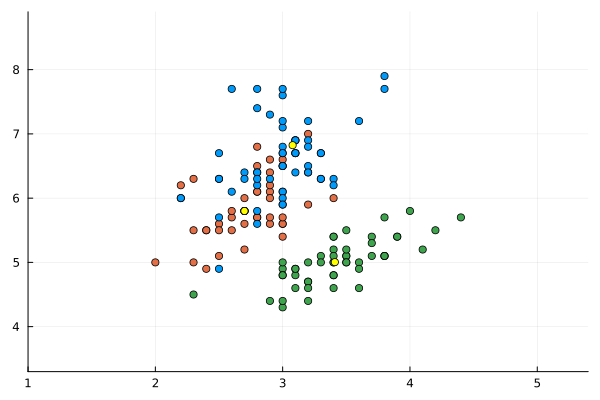

In [21]:
xs = vcat(xp, x)
xmin = minimum(xs)
xmax = maximum(xs)

ys = vcat(yp, y)
ymin = minimum(ys)
ymax = maximum(ys)

plot(xp, yp, seriestype=:scatter, color=sp, legend=:none, xlims=(xmin-1.0, xmax+1.0), ylims=(ymin-1.0, ymax+1.0))
g = plot!(x, y, seriestype=:scatter, color="yellow")

In [22]:
savefig(g,"iris_dataset_test.svg")

"/home/rsm/proj/github/julia/src/iris_dataset_test.svg"

In [23]:
kbest, mp, xc, tv = find_best_cluster(MI, 2:15; dmetric=(x,y;kwargs...) -> LP(x,y,1;kwargs...), verbose=true, num_trials=300, N=1000, threshold=1.0e-2)

var_by_k     = [103.71285714285709, 81.04100016262802, 75.3526572455636, 62.62658199643495, 61.80336732233284, 60.5043647450138, 55.30145647955248, 51.299227272727265, 48.53687073160758, 45.77773504273505, 47.252166714864124, 45.240556914705536, 42.76719111298057, 40.47200269029215]
var_by_k_mod = [146.67212916389184, 140.36712977786937, 150.7053144911272, 140.03729454249304, 151.38671432551536, 160.07950234925048, 156.41613954473718, 153.8976818181818, 153.48706200904311, 151.82757088905618, 163.68630703571924, 175.66462058548066, 171.45018914941778, 167.19721856764085]
rel change of var [-0.04491791914531642, 0.06859867383022188, -0.07617984897156846, 0.07496972131001217, 0.05430294257643174, -0.02342061896666057, -0.016364494232802878, -0.002675273106175565, -0.010930103868944635, 0.07244794241753696, 0.06818853739494245, -0.02458108361951138, -0.02543685007568691]
mono_var_by_mod: [146.67212916389184, 140.36712977786937, 140.36712977786937, 140.03729454249304, 140.03729454249304, 1

(3, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  3, 3, 2, 3, 3, 3, 2, 3, 2, 2], [3.3109090909090915 2.753846153846154 3.0999999999999996; 4.996363636363635 5.903846153846152 6.853488372093022], 81.04100016262802)

In [24]:
xc

2×3 Matrix{Float64}:
 3.31091  2.75385  3.1
 4.99636  5.90385  6.85349

In [25]:
x = xc[1, :]
y = xc[2, :]

3-element Vector{Float64}:
 4.996363636363635
 5.903846153846152
 6.853488372093022

In [26]:
xp = MI[1, :]
yp = MI[2, :];
sp = map(iris[:, :Species]) do spec
      if spec == "virginica"
        1
    elseif spec == "versicolor"
        2
    else
        3
    end
    end;

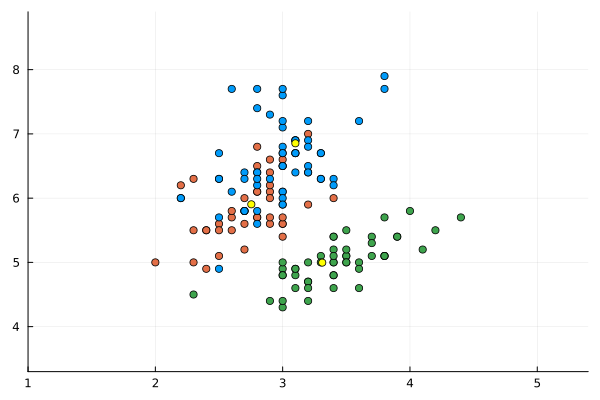

In [27]:
xs = vcat(xp, x)
xmin = minimum(xs)
xmax = maximum(xs)

ys = vcat(yp, y)
ymin = minimum(ys)
ymax = maximum(ys)

plot(xp, yp, seriestype=:scatter, color=sp, legend=:none, xlims=(xmin-1.0, xmax+1.0), ylims=(ymin-1.0, ymax+1.0))
g = plot!(x, y, seriestype=:scatter, color="yellow")

In [28]:
kbest, mp, xc, tv = find_best_cluster(MI, 2:10; dmetric=KL, verbose=true, num_trials=300, N=1000, threshold=1.0e-2)

var_by_k     = [13.701831463089183, 8.310219089521219, 7.048754888337654, 6.044496115955885, 4.8348909435325, 4.314643058663976, 4.041742097193028, 3.4689853292516526, 3.1815863551118166]
var_by_k_mod = [19.37731588445111, 14.393721685079527, 14.097509776675308, 13.51590420501081, 11.843015773658143, 11.41547252923595, 11.431772978929313, 10.406955987754959, 10.061059454666639]
rel change of var [-0.3462338864407499, -0.02101164766661905, -0.043031199603270155, -0.14125527343074154, -0.03745296073616049, 0.0014258899055647125, -0.09847423131030587, -0.03437973253680378]
mono_var_by_mod: [19.37731588445111, 14.393721685079527, 14.097509776675308, 13.51590420501081, 11.843015773658143, 11.41547252923595, 11.41547252923595, 10.406955987754959, 10.061059454666639]
mono_var_series: [-0.17311694322037496, -0.010505823833309525, -0.021515599801635078, -0.07062763671537077, -0.018726480368080244, 0.0, -0.03230264266411918, -0.01718986626840189]


(3, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  3, 3, 2, 3, 3, 3, 2, 3, 3, 2], [3.4510204081632656 2.672222222222222 3.089361702127659; 5.016326530612244 5.757407407407408 6.804255319148933], 8.310219089521219)

In [29]:
xc

2×3 Matrix{Float64}:
 3.45102  2.67222  3.08936
 5.01633  5.75741  6.80426

In [30]:
x = xc[1, :]
y = xc[2, :]

3-element Vector{Float64}:
 5.016326530612244
 5.757407407407408
 6.804255319148933

In [31]:
xp = MI[1, :]
yp = MI[2, :];
sp = map(iris[:, :Species]) do spec
      if spec == "virginica"
        1
    elseif spec == "versicolor"
        2
    else
        3
    end
    end;
spec = iris[:, :Species];

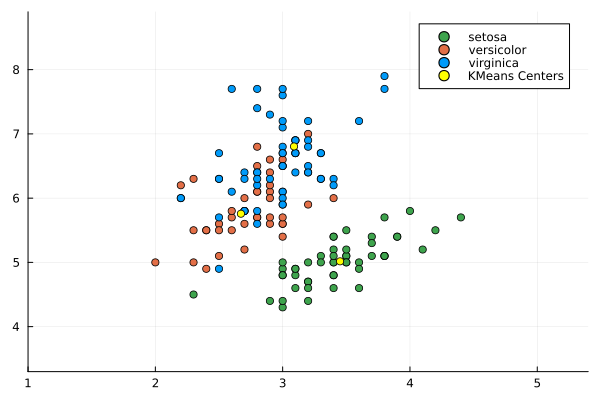

In [32]:
xs = vcat(xp, x)
xmin = minimum(xs)
xmax = maximum(xs)

ys = vcat(yp, y)
ymin = minimum(ys)
ymax = maximum(ys)

plot(xp, yp, seriestype=:scatter, color=sp, group=spec, legend=true, xlims=(xmin-1.0, xmax+1.0), ylims=(ymin-1.0, ymax+1.0))
g = plot!(x, y, seriestype=:scatter, color="yellow", label="KMeans Centers")

In [33]:
kbest, mp, xc, tv = find_best_cluster(MI, 2:15; dmetric=CD, verbose=true, num_trials=300, N=1000, threshold=1.0e-2)

var_by_k     = [0.09995759696909812, 0.05437932001281265, 0.03882933017103074, 0.02766621277998349, 0.018461665178099773, 0.013916424537368188, 0.015274270438586757, 0.015129532118718814, 0.008082068181218371, 0.010118186993729128, 0.008001064741759656, 0.007543767899705567, 0.008950169686520182, 0.0088382054301398]
var_by_k_mod = [0.14136138929592235, 0.09418774514323854, 0.07765866034206148, 0.06186353245601652, 0.045221659488452776, 0.03681939846507332, 0.04320216081920767, 0.05043177372906271, 0.025557743657424543, 0.03660897798202211, 0.027716501294751363, 0.027199441972587706, 0.03588050198619477, 0.03651223727071084]
rel change of var [-0.500846942252872, -0.21284277540163246, -0.2553221139978535, -0.3680066843149178, -0.22820201778553745, 0.14774173867934337, 0.14335432556259223, -0.9732482806404643, 0.301872243743723, -0.32083691201510717, -0.019009923905231686, 0.24194366112679108, 0.017302015207455754]
mono_var_by_mod: [0.14136138929592235, 0.09418774514323854, 0.07765866034

(3, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  2, 3, 2, 2, 2, 3, 3, 2, 2, 2], [3.4510204081632656 2.985714285714286 2.717777777777777; 5.016326530612244 6.058928571428571 6.4755555555555535], 0.05437932001281265)

In [34]:
xc

2×3 Matrix{Float64}:
 3.45102  2.98571  2.71778
 5.01633  6.05893  6.47556

In [35]:
x = xc[1, :]
y = xc[2, :]

3-element Vector{Float64}:
 5.016326530612244
 6.058928571428571
 6.4755555555555535

In [36]:
tv

0.05437932001281265

In [37]:
xp = MI[1, :]
yp = MI[2, :];
sp = map(iris[:, :Species]) do spec
      if spec == "virginica"
        1
    elseif spec == "versicolor"
        2
    else
        3
    end
    end;
spec = iris[:, :Species];

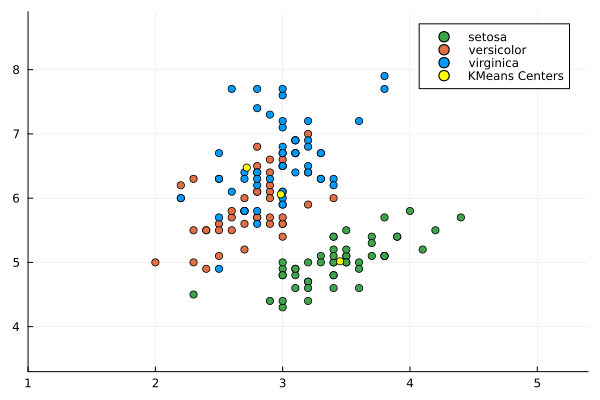

In [38]:
xs = vcat(xp, x)
xmin = minimum(xs)
xmax = maximum(xs)

ys = vcat(yp, y)
ymin = minimum(ys)
ymax = maximum(ys)

plot(xp, yp, seriestype=:scatter, color=sp, group=spec, legend=true, xlims=(xmin-1.0, xmax+1.0), ylims=(ymin-1.0, ymax+1.0))
g = plot!(x, y, seriestype=:scatter, color="yellow", label="KMeans Centers")

In [39]:
kbest, mp, xc, tv = find_best_cluster(MI, 2:10; dmetric=JD, verbose=true, num_trials=300, N=1000, threshold=1.0e-2)

var_by_k     = [150.0, 150.0, 150.0, 150.0, 149.33333333333331, 150.0, 150.0, 148.0, 148.0]
var_by_k_mod = [318.1980515339464, 433.01270189221935, 525.0, 603.7383539249433, 609.6507804260355, 737.0307223679931, 795.495128834866, 789.3333333333334, 842.4307686688564]
rel change of var [0.2651530771650466, 0.17521390115767743, 0.13041800875008197, 0.009698054510748594, 0.17282853763911074, 0.07349436137026216, -0.007806328760387649, 0.06302884143159147]
mono_var_by_mod: [318.1980515339464, 318.1980515339464, 318.1980515339464, 318.1980515339464, 318.1980515339464, 318.1980515339464, 318.1980515339464, 318.1980515339464, 318.1980515339464]
mono_var_series: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
kbest is 3; however, there are 2 centroids with no associated points -- re-adjusting...


(1, OrderedCollections.OrderedDict(1 => 1, 2 => 1, 3 => 1, 4 => 1, 5 => 1, 6 => 1, 7 => 1, 8 => 1, 9 => 1, 10 => 1…), [3.057333333333334; 5.843333333333335;;], 150.0)

In [40]:
display(xc)

2×1 Matrix{Float64}:
 3.057333333333334
 5.843333333333335

In [41]:
x = xc[1, :]
y = xc[2, :]

1-element Vector{Float64}:
 5.843333333333335

In [42]:
tv

150.0

In [43]:
xp = MI[1, :]
yp = MI[2, :];
sp = map(iris[:, :Species]) do spec
      if spec == "virginica"
        1
    elseif spec == "versicolor"
        2
    else
        3
    end
    end;
spec = iris[:, :Species];

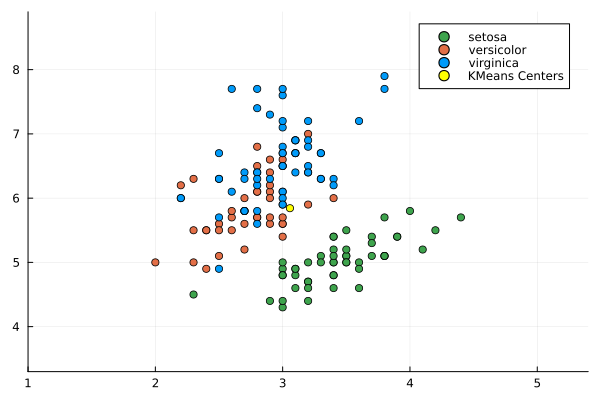

┌ Warning: /cache/build/default-maughin-0/julialang/julia-release-1-dot-10/usr/share/julia/stdlib/v1.10/Test/src is not an existing directory, Revise is not watching
└ @ Revise /home/rsm/.julia/packages/Revise/FaTes/src/packagedef.jl:573
┌ Warning: /cache/build/default-maughin-0/julialang/julia-release-1-dot-10/usr/share/julia/stdlib/v1.10/OpenLibm_jll/src is not an existing directory, Revise is not watching
└ @ Revise /home/rsm/.julia/packages/Revise/FaTes/src/packagedef.jl:573
┌ Warning: /home/rsm/.julia/juliaup/julia-1.10.1+0.x64.linux.gnu/share/julia/stdlib/v1.10/CompilerSupportLibraries_jll/src/CompilerSupportLibraries_jll.jl/src is not an existing directory, Revise is not watching
└ @ Revise /home/rsm/.julia/packages/Revise/FaTes/src/packagedef.jl:573
┌ Warning: /home/rsm/.julia/juliaup/julia-1.10.1+0.x64.linux.gnu/share/julia/stdlib/v1.10/Statistics/src/Statistics.jl/src is not an existing directory, Revise is not watching
└ @ Revise /home/rsm/.julia/packages/Revise/FaTes/src/pa

In [44]:
xs = vcat(xp, x)
xmin = minimum(xs)
xmax = maximum(xs)

ys = vcat(yp, y)
ymin = minimum(ys)
ymax = maximum(ys)

plot(xp, yp, seriestype=:scatter, color=sp, group=spec, legend=true, xlims=(xmin-1.0, xmax+1.0), ylims=(ymin-1.0, ymax+1.0))
g = plot!(x, y, seriestype=:scatter, color="yellow", label="KMeans Centers")